https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install imbalanced-learn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz

In [3]:
#  Read the CSV and Perform Basic Data Cleaning
data = pd.read_csv('../data/combined_wine.csv', sep=',')
# Drop the null columns where all values are null
data = data.dropna(axis='columns', how='all')
# Drop the null rows
data = data.dropna()

#the n_neighbors error is happening because there are so few "9" class members - elimintating them should remove the
#problem (just as proof of concept, we want these points)

#data = data.drop(data[(data.quality == 9)].index)



data.groupby(["quality"]).count()

#no quality = 9 row now

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,,,,,,,,,,,,
3,30,30,30,30,30,30,30,30,30,30,30,30
4,216,216,216,216,216,216,216,216,216,216,216,216
5,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138
6,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836,2836
7,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079
8,193,193,193,193,193,193,193,193,193,193,193,193
9,5,5,5,5,5,5,5,5,5,5,5,5


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [5]:
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [6]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [7]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [8]:
data['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [9]:
# normalise the quality column 
data['normquality'] = StandardScaler().fit_transform(np.array(data['quality']).reshape(-1, 1)) 
# drop irrevelent columns as they are not relevant for prediction purpose  
# df = df.drop(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates'], axis = 1) 
   
data['normquality'].value_counts() 

-0.494607    5220
 2.021807    1277
Name: normquality, dtype: int64

In [10]:
#X = data.drop(columns=["quality"])
#y = data["quality"]
#print(X.shape, y.shape)

In [11]:
# Let's split the data into training and testing sets:
#X_train = data.values[0:5000]
#X_test = data.values[5000:]

In [12]:
from sklearn.model_selection import train_test_split

y = data["quality"]
# X = data.drop(columns=["quality"])
X = data[["alcohol", "chlorides", "density", "volatile acidity","residual sugar", "citric acid", "free sulfur dioxide", "type", "pH", "fixed acidity", "total sulfur dioxide", "sulphates"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# split into 70:30 ration
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (4872, 12)
y_train dataset:  (4872,)
X_test dataset:  (1625, 12)
y_test dataset:  (1625,)


In [13]:
# logistic regression object 
lr = LogisticRegression(max_iter=10000) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1306
           1       0.54      0.24      0.33       319

    accuracy                           0.81      1625
   macro avg       0.69      0.60      0.61      1625
weighted avg       0.78      0.81      0.78      1625



In [14]:
!pip install mlrose

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
#!pip install mlrose (done in cell above), six
#!pip instal imblearn done in first cell
from imblearn.over_sampling import SMOTE
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
import mlrose

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 958
Before OverSampling, counts of label '0': 3914 

After OverSampling, the shape of train_X: (7828, 12)
After OverSampling, the shape of train_y: (7828,) 

After OverSampling, counts of label '1': 3914
After OverSampling, counts of label '0': 3914


In [16]:
lr1 = LogisticRegression(max_iter=50000) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1306
           1       0.39      0.76      0.51       319

    accuracy                           0.72      1625
   macro avg       0.65      0.73      0.66      1625
weighted avg       0.82      0.72      0.74      1625



In [17]:
# Save the Model

import joblib
filename = 'logistic_model.h5'
joblib.dump(lr1, filename)

['logistic_model.h5']

In [30]:
#To show what SMOTE does, let visualize the good and bad wines as a function of alcohol and density (before SMOTE)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 4182 to 1866
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               4872 non-null   float64
 1   chlorides             4872 non-null   float64
 2   density               4872 non-null   float64
 3   volatile acidity      4872 non-null   float64
 4   residual sugar        4872 non-null   float64
 5   citric acid           4872 non-null   float64
 6   free sulfur dioxide   4872 non-null   float64
 7   type                  4872 non-null   int64  
 8   pH                    4872 non-null   float64
 9   fixed acidity         4872 non-null   float64
 10  total sulfur dioxide  4872 non-null   float64
 11  sulphates             4872 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 494.8 KB


In [31]:
#We need to turn this dataframe into a numpy array

X_train_2 = X_train.sort_index()
X_train_2 = X_train.to_numpy()
X_train_2[0]

array([9.0000e+00, 6.2000e-02, 9.9808e-01, 1.8000e-01, 1.2800e+01,
       3.0000e-01, 1.9000e+01, 0.0000e+00, 3.0000e+00, 6.8000e+00,
       1.7100e+02, 5.2000e-01])

In [32]:
#To show what SMOTE does, let visualize the good and bad wines as a function of alcohol and density (after SMOTE)

X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               7828 non-null   float64
 1   chlorides             7828 non-null   float64
 2   density               7828 non-null   float64
 3   volatile acidity      7828 non-null   float64
 4   residual sugar        7828 non-null   float64
 5   citric acid           7828 non-null   float64
 6   free sulfur dioxide   7828 non-null   float64
 7   type                  7828 non-null   int64  
 8   pH                    7828 non-null   float64
 9   fixed acidity         7828 non-null   float64
 10  total sulfur dioxide  7828 non-null   float64
 11  sulphates             7828 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 734.0 KB


In [33]:
#We need to turn this dataframe into a numpy array

X_train_res_2 = X_train_res.sort_index()
X_train_res_2 = X_train_res.to_numpy()
X_train_res_2[0]

array([9.0000e+00, 6.2000e-02, 9.9808e-01, 1.8000e-01, 1.2800e+01,
       3.0000e-01, 1.9000e+01, 0.0000e+00, 3.0000e+00, 6.8000e+00,
       1.7100e+02, 5.2000e-01])

Counter({0: 3914, 1: 958})


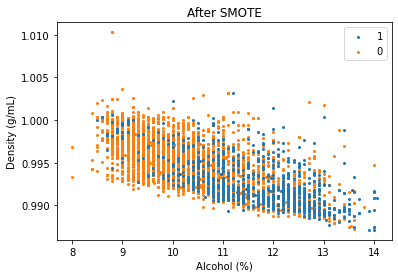

In [34]:
from collections import Counter
from matplotlib import pyplot
from numpy import where


counter = Counter(y_train)
print(counter)

y_train_rav = y_train.ravel()


# scatter plot of examples by class label before SMOTE

for label, _ in counter.items():
    row_ix = where(y_train_rav == label)[0]
    pyplot.scatter(X_train_2[row_ix, 0], X_train_2[row_ix, 2], label=str(label), zorder=label, s=4)
pyplot.legend()
pyplot.title("After SMOTE")
pyplot.xlabel("Alcohol (%)")
pyplot.ylabel("Density (g/mL)")
pyplot.show()

Counter({1: 3914, 0: 3914})


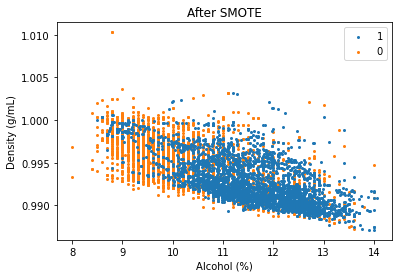

In [35]:
#AFTER smote

y_train_res_rav = y_train_res.ravel()

counter = Counter(y_train_res)
print(counter)

for label, _ in counter.items():
    row_ix = where(y_train_res == label)[0]
    pyplot.scatter(X_train_res_2[row_ix, 0], X_train_res_2[row_ix, 2], label=str(label), zorder=label, s=4)
pyplot.legend()
pyplot.title("After SMOTE")
pyplot.xlabel("Alcohol (%)")
pyplot.ylabel("Density (g/mL)")
pyplot.show()

In [ ]:
#forced blue 1's on top so that's why they may look now OVERsampled on second plot.